In [2]:
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import optuna
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import f1_score



# Cell 2: Carregamento dos dados
data = pd.read_csv('/home/cid34senhas/Desktop/DAATP/Entrega/2_data_Random_Forest_Clean.csv') 

# Separação das features e do target
X = data.drop('Transition', axis=1)
y = data['Transition']




In [24]:
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 500)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2'])
    max_depth = trial.suggest_int('max_depth', 5, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 100)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    bootstrap = trial.suggest_categorical('bootstrap', [False, True])
    class_weight = trial.suggest_categorical('class_weight', [None, 'balanced'])


    model1 = RandomForestClassifier(
        n_estimators=n_estimators,
        max_features=max_features,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=34,
        bootstrap=bootstrap,
        class_weight=class_weight
    )

    scores_5 = cross_val_score(model1, X, y, cv=5, scoring='f1_macro')
    accuracy_5 = scores_5.mean()

    return accuracy_5



In [25]:
study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler())
study.optimize(objective, n_trials=300)
print(f"Melhor F1_Score: {study.best_value}")
print(f"Melhores hiperparâmetros: {study.best_params}")


[I 2025-01-18 23:02:34,874] A new study created in memory with name: no-name-79ddd099-5eaf-4783-9eb3-e1f638a3bf23
[I 2025-01-18 23:02:37,557] Trial 0 finished with value: 0.2961265298308776 and parameters: {'n_estimators': 282, 'max_features': 'log2', 'max_depth': 17, 'min_samples_split': 63, 'min_samples_leaf': 17, 'bootstrap': True, 'class_weight': None}. Best is trial 0 with value: 0.2961265298308776.
[I 2025-01-18 23:02:39,895] Trial 1 finished with value: 0.3065832890213004 and parameters: {'n_estimators': 237, 'max_features': 'log2', 'max_depth': 42, 'min_samples_split': 57, 'min_samples_leaf': 10, 'bootstrap': False, 'class_weight': None}. Best is trial 1 with value: 0.3065832890213004.
[I 2025-01-18 23:02:41,692] Trial 2 finished with value: 0.30402964002361654 and parameters: {'n_estimators': 138, 'max_features': 'sqrt', 'max_depth': 50, 'min_samples_split': 31, 'min_samples_leaf': 17, 'bootstrap': True, 'class_weight': None}. Best is trial 1 with value: 0.3065832890213004.
[I

Melhor F1_Score: 0.39517746656845654
Melhores hiperparâmetros: {'n_estimators': 143, 'max_features': 'sqrt', 'max_depth': 24, 'min_samples_split': 32, 'min_samples_leaf': 13, 'bootstrap': False, 'class_weight': 'balanced'}


### Resultados 
#### Tentativa 1: 
Melhor F1_Score : 0.36041648923638786

Melhores hiperparâmetros: {'n_estimators': 210, 'max_features': 'sqrt', 'max_depth': 15, 'min_samples_split': 10, 'min_samples_leaf': 20, 'bootstrap': False}

#### Tentativa 2: 
Melhor F1_Score: 0.35570703695449063

Melhores hiperparâmetros: {'n_estimators': 173, 'max_features': 'sqrt', 'max_depth': 22, 'min_samples_split': 40, 'min_samples_leaf': 11, 'bootstrap': False}

#### Tentativa 3: 
Melhor F1_Score: 0.3708177473272097

Melhores hiperparâmetros: {'n_estimators': 271, 'max_features': 'sqrt', 'max_depth': 27, 'min_samples_split': 50, 'min_samples_leaf': 11, 'bootstrap': False}

### Tentativa 4: 

Melhor F1_Score: 0.39517746656845654

Melhores hiperparâmetros: {'n_estimators': 143, 'max_features': 'sqrt', 'max_depth': 24, 'min_samples_split': 32, 'min_samples_leaf': 13, 'bootstrap': False, 'class_weight': 'balanced'}




In [30]:
def plot_confusion_matrix_with_labels(confusion_matrix, label_mapping):
    # Criar um mapeamento inverso
    reverse_label_mapping = {v: k for k, v in label_mapping.items()}
    
    # Aplicar o mapeamento inverso na matriz de confusão
    cm_with_labels = np.zeros_like(confusion_matrix, dtype=object)
    for i in range(confusion_matrix.shape[0]):
        for j in range(confusion_matrix.shape[1]):
            cm_with_labels[i, j] = f"{reverse_label_mapping[i]} (Pred: {reverse_label_mapping[j]})"

    # Criar um DataFrame para facilitar a visualização
    df_cm = pd.DataFrame(confusion_matrix, index=reverse_label_mapping.values(), columns=reverse_label_mapping.values())
    
    # Plotar a matriz de confusão
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix with Labels')
    plt.show()
label_mapping = {
    'CN-CN': 0,
    'AD-AD': 1,
    'MCI-AD': 2,
    'MCI-MCI': 3,
    'CN-MCI' : 4
}

X_trail = data.drop(['Transition'], axis= 1)
y_trail = data['Transition']



In [ ]:
rf_model_final = RandomForestClassifier(n_estimators=143, max_features = 'sqrt', max_depth= 24, min_samples_split=32, min_samples_leaf=13, bootstrap=False,class_weight = 'balanced',random_state=34)
rf_score = cross_val_score(rf_model_final, X_trail, y_trail, cv=5,scoring='f1_macro')
print(f"Cross Validation Score: {rf_score}")
print(f"Cross Validation Score Média: {rf_score.mean()}")
print(f"Cross Validation Score STD: {rf_score.std()}")


Cross Validation Score: [0.47478261 0.29848841 0.4116514  0.43780664 0.35315827]
Cross Validation Score Média: 0.39517746656845654
Cross Validation Score STD: 0.06251400064162042


## Gerar CSV para submissão

In [28]:
def remove_highly_correlated_features(data, target, threshold):
    """
    Remove features altamente correlacionadas, mantendo a que tem maior correlação com o target.

    Args:
        data (pd.DataFrame): DataFrame contendo as features.
        target (pd.Series): Coluna com os valores do target.
        threshold (float): Valor de correlação acima do qual consideramos features altamente correlacionadas.

    Returns:
        pd.DataFrame: DataFrame com as colunas altamente correlacionadas removidas.
        set: Conjunto das colunas removidas.
    """
    # Compute the correlation matrix
    corr_matrix = data.corr().abs()
    
    # Compute correlation of each feature with the target
    target_corr = data.corrwith(data['Transition']).abs()
    
    # Identify columns to remove based on correlation
    to_drop = set()
    for i in range(len(corr_matrix.columns)):
        for j in range(i + 1, len(corr_matrix.columns)):
            if corr_matrix.iloc[i, j] >= threshold:
                col_i = corr_matrix.columns[i]
                col_j = corr_matrix.columns[j]
                
                # Remove the column with lower correlation with the target
                if target_corr[col_i] < target_corr[col_j]:
                    to_drop.add(col_i)
                else:
                    to_drop.add(col_j)

    # Drop the identified columns
    data_final = data.drop(columns=to_drop)

    return data_final, to_drop


def remove_low_variance_features(data, threshold):
    """
    Remove columns with a standard deviation below the given threshold.

    Parameters:
        data (pd.DataFrame): The input DataFrame.
        threshold (float): The minimum standard deviation a column must have to be retained.

    Returns:
        tuple: A tuple containing:
            - pd.DataFrame: A DataFrame with low-variance columns removed.
            - list: A list of columns that were removed.
    """
    # Calculate the standard deviation for each column
    std_dev = data.std()

    # Identify columns to keep (standard deviation above threshold)
    retained_columns = std_dev[std_dev > threshold].index

    # Identify columns to remove
    removed_columns = std_dev[std_dev <= threshold].index

    # Create a new DataFrame with only the retained columns
    data_reduced = data[retained_columns]

    return data_reduced, removed_columns

from sklearn.base import ClassifierMixin

def generate_predictions_csv(model: ClassifierMixin, test_data: pd.DataFrame):
    """
    Gera um arquivo CSV com as previsões do modelo fornecido e o conjunto de teste.

    Parameters:
    - model: Classificador treinado (ex: RandomForestClassifier, DecisionTreeClassifier).
    - test_data: DataFrame de teste para o qual as previsões serão feitas.
    - output_filename: Nome do arquivo de saída para salvar as previsões (padrão é 'predictions.csv').
    """
    # Realizar as previsões
    predictions = model.predict(test_data)
    
    # Mapeamento inverso para converter de números para labels
    label_mapping = {
        0: 'CN-CN',
        1: 'AD-AD',
        2: 'MCI-AD',
        3: 'MCI-MCI',
        4:  'CN-MCI'

    }
    
    # Converter as previsões numéricas para as labels correspondentes
    predictions_labels = [label_mapping[pred] for pred in predictions]
    
    # Criar DataFrame com as previsões
    predictions_df = pd.DataFrame(predictions_labels, columns=['Result'])
    predictions_df.index = range(1, len(predictions_df) + 1)
    predictions_df.index.name = 'RowId'
    
    # Exibir a contagem de cada label prevista
    counts = predictions_df['Result'].value_counts()
    print("Contagem de previsões para cada label:")
    print(counts)
    
    # Extrair o nome do modelo para o arquivo de saída
    model_name = str(model)  
    if '(' in model_name:
        output_filename = model_name.split('(')[0] + ".csv"
    else:
        output_filename = model_name + ".csv"
    
    # Salvar o DataFrame em um arquivo CSV
    predictions_df.to_csv(output_filename, index=True)
    print(f"Resultados salvos no arquivo {output_filename}")




In [46]:
data_test = pd.read_csv('/home/cid34senhas/Desktop/DAATP/Entrega/1_DF_Test_1_After_Pre_Processamento.csv') 
data_original= pd.read_csv('/home/cid34senhas/Desktop/DAATP/Entrega/1_DF_CN-MCI_1_After_Pre_Processamento.csv') 
X_cleaned, to_drop = remove_highly_correlated_features(data_original, 'Transition', 0.81)
data
data_f = data_test.drop(columns=to_drop,axis=1)

X_cleaned_lV, to_drop_2 = remove_low_variance_features(X_cleaned, 0.005)

data_final = data_f.drop(columns=to_drop_2,axis=1, errors='ignore')

print("Shape Do data_set Final de treino do Random Forest ")
print(data.shape)
print("\n")
print("Shape Do data_set Final de test do Random Forest ")
print(data_final.shape)

X_train, X_test, y_train, y_test = train_test_split(X_trail, y_trail, test_size=0.25, random_state=34, stratify=y)

rf_model_final.fit(X_train,y_train)
generate_predictions_csv(rf_model_final,data_final)


Shape Do data_set Final de treino do Random Forest 
(305, 348)


Shape Do data_set Final de test do Random Forest 
(100, 347)
Contagem de previsões para cada label:
Result
CN-CN      42
AD-AD      27
MCI-AD     16
MCI-MCI    13
CN-MCI      2
Name: count, dtype: int64
Resultados salvos no arquivo RandomForestClassifier.csv


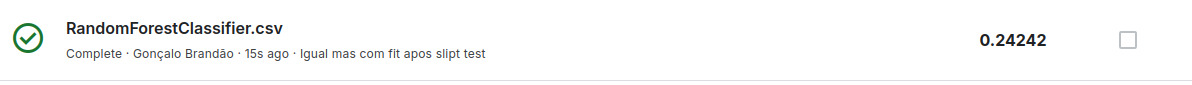


Os resultados obtidos vão contra o esperado, esperavamos resultados perto do f1_macro medio obtido no cross_validation, dentro da baliza do desvio padrão do mesmo. Contudo, como a privada são apenas 30% dos dados de teste, o valor de 0.395177 é o esperado na privada 